# Regression Example

## Libraries

In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load Data

In [180]:
path = "/home/adrian_alvarez/Projects/NBA_over_under_predictor/data/train_data/training_data_from_2005-12-01_to_2026-01-10.csv"

df_stats = pd.read_csv(path)

dtype_dict = {col: str for col in df_stats.columns if "ID" in col.upper()}

df_stats = pd.read_csv(
    path,
    dtype=dtype_dict
)
df_stats['GAME_DATE'] = pd.to_datetime(df_stats['GAME_DATE']).dt.strftime('%Y-%m-%d')

/tmp/ipykernel_2373380/1294941109.py:3: DtypeWarning: Columns (205,206,207,248,249,250,291,292,293,334,335,336,377,378,379,420,421,422,616,617,618,659,660,661,702,703,704,745,746,747,788,789,790,831,832,833) have mixed types. Specify dtype option on import or set low_memory=False.
  df_stats = pd.read_csv(path)
/tmp/ipykernel_2373380/1294941109.py:7: DtypeWarning: Columns (205,206,207,248,249,250,291,292,293,334,335,336,377,378,379,420,421,422,616,617,618,659,660,661,702,703,704,745,746,747,788,789,790,831,832,833) have mixed types. Specify dtype option on import or set low_memory=False.
  df_stats = pd.read_csv(


In [181]:
df_stats.shape[0]

23691

In [182]:
df_stats

TOTAL_OVER_UNDER_LINE TEAM_ID_TEAM_HOME TEAM_CITY_TEAM_HOME  \
0                   240.9999        1610612762                Utah   
1                   240.4999        1610612739           Cleveland   
2                   214.4999        1610612765             Detroit   
3                   236.4999        1610612754             Indiana   
4                   233.4999        1610612741             Chicago   
...                      ...               ...                 ...   
23686               215.5000        1610612740         New Orleans   
23687               191.0000        1610612739           Cleveland   
23688               183.5000        1610612747         Los Angeles   
23689               208.5000        1610612759         San Antonio   
23690               192.0000        1610612744        Golden State   

      TEAM_ABBREVIATION_TEAM_HOME    TEAM_NAME_TEAM_HOME MATCHUP_TEAM_HOME  \
0                             UTA              Utah Jazz       UTA vs. CHA   
1                             CLE    Cleveland Cavaliers       CLE vs. MIN   
2                             DET        Detroit Pistons       DET vs. LAC   
3                             IND         Indiana Pacers       IND vs. MIA   
4                             CHI          Chicago Bulls       CHI vs. DAL   
...                           ...                    ...               ...   
23686                         NOH   New Orleans Pelicans       NOH vs. SAC   
23687                         CLE    Cleveland Cavaliers       CLE vs. DAL   
23688                         LAL     Los Angeles Lakers       LAL vs. HOU   
23689                         SAS      San Antonio Spurs       SAS vs. POR   
23690                         GSW  Golden State Warriors       GSW vs. UTA   

       GAME_NUMBER_TEAM_HOME TEAM_ID_TEAM_AWAY TEAM_CITY_TEAM_AWAY  \
0                         38        1610612766           Charlotte   
1                         40        1610612750           Minnesota   
2                         38        1610612746                  LA   
3                         39        1610612748               Miami   
4                         38        1610612742              Dallas   
...                      ...               ...                 ...   
23686                      1        1610612758          Sacramento   
23687                      1        1610612742              Dallas   
23688                      1        1610612745             Houston   
23689                      1        1610612757            Portland   
23690                      1        1610612762                Utah   

      TEAM_ABBREVIATION_TEAM_AWAY  ... PTS_TREND_SLOPE_DIFF_HOME_MINUS_AWAY  \
0                             CHA  ...                                  1.7   
1                             MIN  ...                                 -3.8   
2                             LAC  ...                                 -8.5   
3                             MIA  ...                                  8.6   
4                             DAL  ...                                  2.3   
...                           ...  ...                                  ...   
23686                         SAC  ...                                  NaN   
23687                         DAL  ...                                  NaN   
23688                         HOU  ...                                  NaN   
23689                         POR  ...                                  NaN   
23690                         UTA  ...                                  NaN   

      PTS_TREND_SLOPE_SUM_HOME_PLUS_AWAY  \
0                                   -3.1   
1                                  -13.4   
2                                   -3.3   
3                                   -1.6   
4                                    0.1   
...                                  ...   
23686                                NaN   
23687                                NaN   
23688                                NaN   

In [183]:
#count nas in TOTA_OVER_UNDER_LINE
nans = df_stats['TOTAL_OVER_UNDER_LINE'].isna().sum()
print(f"Number of NaNs in TOTAL_OVER_UNDER_LINE: {nans}")

Number of NaNs in TOTAL_OVER_UNDER_LINE: 1702


In [184]:
df_stats.dropna(subset=['TOTAL_OVER_UNDER_LINE'], inplace=True)
df_stats = df_stats[df_stats['TOTAL_OVER_UNDER_LINE'] > 100]

In [185]:
df_stats['SEASON_YEAR'].unique()

array([2025, 2024, 2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015,
       2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007])

In [186]:
#drop season 2007
df_stats = df_stats[df_stats['SEASON_YEAR'] != 2007]

In [187]:
df_to_train = df_stats.copy()

In [188]:
text_columns = df_to_train.select_dtypes(include=['object', 'string']).columns

# Print the names of the columns containing text
# print("Text columns:", list(text_columns))
cols_to_drop = ['SEASON_ID', 'GAME_ID', 'SEASON_TYPE',  'TEAM_ID_TEAM_HOME',
       'TEAM_ID_TEAM_AWAY','IS_OVERTIME']

cols_to_drop += [
    "MATCHUP_TEAM_HOME",
    "GAME_NUMBER_TEAM_HOME",
    "TEAM_CITY_TEAM_AWAY",
    "TEAM_ABBREVIATION_TEAM_AWAY",
    "TEAM_ABBREVIATION_TEAM_HOME",
    "TEAM_CITY_TEAM_HOME",
    "TEAM_NAME_TEAM_AWAY",
    "MATCHUP_TEAM_AWAY",
    'TEAM_NAME_TEAM_HOME'
]
cols_to_drop += list(text_columns)

cols_to_drop.pop(cols_to_drop.index('GAME_DATE'))

df_to_train.drop(columns=cols_to_drop, inplace=True, errors='ignore')


In [189]:
#Calculate number fo rows with at least 1 NA in total and in percentage
rows_with_na = df_to_train.isna().any(axis=1).sum()
total_rows = df_to_train.shape[0]
percentage_with_na = (rows_with_na / total_rows) * 100
print(f"Rows with at least one NA: {rows_with_na} out of {total_rows} ({percentage_with_na:.2f}%)")

Rows with at least one NA: 3469 out of 20775 (16.70%)


In [190]:
# Count NAs per column
na_counts = df_to_train.isna().sum()

# Get most common SEASON_YEAR for nulls in each column
most_common_season = []
for col in df_to_train.columns:
    if na_counts[col] > 0:
        # Get rows where this column is null
        null_rows = df_stats[df_stats[col].isna()]
        if len(null_rows) > 0 and 'SEASON_YEAR' in df_stats.columns:
            # Find most common SEASON_YEAR for these null rows
            common_season = null_rows['SEASON_YEAR'].mode()
            most_common_season.append(common_season.iloc[0] if len(common_season) > 0 else None)
        else:
            most_common_season.append(None)
    else:
        most_common_season.append(None)

na_counts_df = pd.DataFrame({
    'Column': na_counts.index,
    'NA_Count': na_counts.values,
    'NA_Percentage': (na_counts.values / len(df_to_train) * 100).round(2),
    'Most_Common_Season_Year': most_common_season
}).sort_values('NA_Count', ascending=False)

# Show only columns with NAs
na_counts_df[na_counts_df['NA_Count'] > 0]

Column  NA_Count  \
514  TOTAL_OVER_UNDER_LINE_COMBINED_TREND_SLOPE_LAS...      2862   
513  TOTAL_OVER_UNDER_LINE_TEAM_AWAY_TREND_SLOPE_LA...      2131   
512  TOTAL_OVER_UNDER_LINE_TEAM_HOME_TREND_SLOPE_LA...      1988   
605                    PTS_FORM_Z_AWAY_LAST5_VS_SEASON      1101   
604                    PTS_FORM_Z_HOME_LAST5_VS_SEASON      1094   
..                                                 ...       ...   
528          REF_TRIO_DIFFERENCE_FROM_LINE_DIFF_BEFORE        23   
598                                   IMPLIED_PTS_AWAY        12   
597                                   IMPLIED_PTS_HOME        12   
531                                MONEYLINE_TEAM_HOME        12   
530                                             SPREAD        12   

     NA_Percentage  Most_Common_Season_Year  
514          13.78                   2022.0  
513          10.26                   2022.0  
512           9.57                   2022.0  
605           5.30                   2010.0  
604           5.27                   2022.0  
..             ...                      ...  
528           0.11                   2023.0  
598           0.06                   2011.0  
597           0.06                   2011.0  
531           0.06                   2011.0  
530           0.06                   2011.0  

[418 rows x 4 columns]

In [192]:
df2= df_to_train[df_to_train['PTS_SEASON_BEFORE_AVG_TEAM_HOME'].isna()]
df2['GAME_DATE']


531      2025-10-26
532      2025-10-26
535      2025-10-26
536      2025-10-26
538      2025-10-26
            ...    
22370    2008-10-29
22371    2008-10-29
22372    2008-10-28
22373    2008-10-28
22374    2008-10-28
Name: GAME_DATE, Length: 540, dtype: object

In [175]:
print(na_counts_df[na_counts_df['NA_Count'] > 0])

                                                Column  NA_Count  \
513  TOTAL_OVER_UNDER_LINE_COMBINED_TREND_SLOPE_LAS...      2862   
512  TOTAL_OVER_UNDER_LINE_TEAM_AWAY_TREND_SLOPE_LA...      2131   
511  TOTAL_OVER_UNDER_LINE_TEAM_HOME_TREND_SLOPE_LA...      1988   
604                    PTS_FORM_Z_AWAY_LAST5_VS_SEASON      1101   
603                    PTS_FORM_Z_HOME_LAST5_VS_SEASON      1094   
..                                                 ...       ...   
527          REF_TRIO_DIFFERENCE_FROM_LINE_DIFF_BEFORE        23   
596                                   IMPLIED_PTS_HOME        12   
530                                MONEYLINE_TEAM_HOME        12   
529                                             SPREAD        12   
597                                   IMPLIED_PTS_AWAY        12   

     NA_Percentage  Most_Common_Season_Year  
513          13.78                   2022.0  
512          10.26                   2022.0  
511           9.57                   2022.0  

In [176]:
na_counts_df[na_counts_df['NA_Count'] > 0].Column.tolist()

['TOTAL_OVER_UNDER_LINE_COMBINED_TREND_SLOPE_LAST_5_GAMES_BEFORE',
 'TOTAL_OVER_UNDER_LINE_TEAM_AWAY_TREND_SLOPE_LAST_5_GAMES_BEFORE',
 'TOTAL_OVER_UNDER_LINE_TEAM_HOME_TREND_SLOPE_LAST_5_GAMES_BEFORE',
 'PTS_FORM_Z_AWAY_LAST5_VS_SEASON',
 'PTS_FORM_Z_HOME_LAST5_VS_SEASON',
 'STAR_PTS_PCT_DIFF_HOME_MINUS_AWAY',
 'TOTAL_PTS_LAST_GAMES_AVG',
 'TOTAL_PTS_SEASON_BEFORE_AVG',
 'TEAMS_DIFFERENCE_OVER_UNDER_LINE_BEFORE',
 'DIFERENCE_HOME_OFF_AWAY_DEF_BEFORE_MATCH',
 'DIFERENCE_AWAY_OFF_HOME_DEF_BEFORE_MATCH',
 'EXPECTED_PTS_AWAY_FROM_OFFR_PACE',
 'OFFDEF_MISMATCH_HOME_OFF_MINUS_AWAY_DEF',
 'OFFDEF_MISMATCH_AWAY_OFF_MINUS_HOME_DEF',
 'EXPECTED_POSS_FROM_PACE',
 'DIFERENCE_POINTS_CONCEDED_VS_EXPECTED_BEFORE_HOME_GAME',
 'EXPECTED_PTS_HOME_FROM_OFFR_PACE',
 'DIFERENCE_POINTS_CONCEDED_VS_EXPECTED_BEFORE_AWAY_GAME',
 'DIFF_FROM_LINE_LAST_HOME_AWAY_1_MATCHES_BEFORE_TEAM_AWAY',
 'DIFF_FROM_LINE_LAST_HOME_AWAY_1_MATCHES_BEFORE_TEAM_HOME',
 'DIFF_FROM_LINE_LAST_HOME_AWAY_2_MATCHES_BEFORE_TEAM_AWAY',
 

In [90]:
# df_to_train.fillna(0, inplace=True)

In [93]:
# Get the columns to keep for checking nulls
columns_to_keep = [col for col in df_to_train.columns if col not in cols_to_drop]

# Drop rows where any of the columns_to_check have nulls
# df_to_train = df_to_train.dropna(subset=columns_to_keep)
df_to_train

TOTAL_OVER_UNDER_LINE  GAME_NUMBER_TEAM_AWAY  IS_PLAYOFF_GAME  \
0                   240.9999                     39                0   
1                   240.4999                     39                0   
2                   214.4999                     38                0   
3                   236.4999                     38                0   
4                   233.4999                     39                0   
...                      ...                    ...              ...   
22370               204.0000                      1                0   
22371               189.0000                      1                0   
22372               183.0000                      1                0   
22373               183.0000                      1                0   
22374               199.0000                      1                0   

       PLAYOFF_GAMES_LAST_SEASON_TEAM_AWAY  \
0                                      0.0   
1                                     15.0   
2                                      7.0   
3                                      4.0   
4                                      0.0   
...                                    ...   
22370                                  0.0   
22371                                  0.0   
22372                                  0.0   
22373                                  0.0   
22374                                 13.0   

       PLAYOFF_GAMES_LAST_SEASON_TEAM_HOME  WINS_BEFORE_THIS_GAME_TEAM_HOME  \
0                                      0.0                               13   
1                                      9.0                               21   
2                                      6.0                               28   
3                                     23.0                                7   
4                                      0.0                               17   
...                                    ...                              ...   
22370                                  0.0                               34   
22371                                 17.0                               19   
22372                                  0.0                               49   
22373                                 21.0                               19   
22374                                 26.0                               47   

       LOSSES_BEFORE_THIS_GAME_TEAM_HOME  TEAM_RECORD_BEFORE_GAME_TEAM_HOME  \
0                                     24                           0.351351   
1                                     18                           0.538462   
2                                      9                           0.756757   
3                                     31                           0.184211   
4                                     20                           0.459459   
...                                  ...                                ...   
22370                                 48                           0.414634   
22371                                 63                           0.231707   
22372                                 33                           0.597561   
22373                                 63                           0.231707   
22374                                 35                           0.573171   

       REST_DAYS_BEFORE_MATCH_TEAM_HOME  \
0                                     2   
1                                     2   
2                                     3   
3                                     2   
4                                     3   
...                                 ...   
22370                                 0   
22371                                 0   
22372                                 0   
22373                                 0   
22374                                 0   

       PTS_LAST_ALL_5_MATCHES_BEFORE_TEAM_HOME  ...  \
0                                        112.2  ...   
1                                        118.8  ...   
2        

In [94]:
null_rows = df_to_train[df_to_train.isnull().any(axis=1)]
print(f"Total number of null values in the DataFrame: {null_rows.shape[0]}")
print(f"Percentage of null values in the DataFrame: {null_rows.shape[0] / df_to_train.shape[0] * 100:.2f}%")
print(f"Total number of rows in the DataFrame: {df_to_train.shape[0]}")

null_columns = df_to_train.columns[df_to_train.isnull().any()].tolist()
print(f"Columns with null values: {null_columns}")


Total number of null values in the DataFrame: 781
Percentage of null values in the DataFrame: 3.77%
Total number of rows in the DataFrame: 20719
Columns with null values: ['PTS_LAST_HOME_AWAY_5_MATCHES_BEFORE_TEAM_HOME', 'FG3A_LAST_HOME_AWAY_5_MATCHES_BEFORE_TEAM_HOME', 'FG3M_LAST_HOME_AWAY_5_MATCHES_BEFORE_TEAM_HOME', 'FGM_LAST_HOME_AWAY_5_MATCHES_BEFORE_TEAM_HOME', 'FGA_LAST_HOME_AWAY_5_MATCHES_BEFORE_TEAM_HOME', 'FG3_PCT_LAST_HOME_AWAY_5_MATCHES_BEFORE_TEAM_HOME', 'FTA_LAST_HOME_AWAY_5_MATCHES_BEFORE_TEAM_HOME', 'FTM_LAST_HOME_AWAY_5_MATCHES_BEFORE_TEAM_HOME', 'PIE_LAST_HOME_AWAY_5_MATCHES_BEFORE_TEAM_HOME', 'PF_LAST_HOME_AWAY_5_MATCHES_BEFORE_TEAM_HOME', 'TOTAL_OVER_UNDER_LINE_LAST_HOME_AWAY_5_MATCHES_BEFORE_TEAM_HOME', 'DIFF_FROM_LINE_LAST_HOME_AWAY_5_MATCHES_BEFORE_TEAM_HOME', 'TOTAL_POINTS_LAST_HOME_AWAY_5_MATCHES_BEFORE_TEAM_HOME', 'MONEYLINE_LAST_HOME_AWAY_5_MATCHES_BEFORE_TEAM_HOME', 'SPREAD_LAST_HOME_AWAY_5_MATCHES_BEFORE_TEAM_HOME', 'STAR_PTS_PERCENTAGE_BEFORE_TEAM_HOME', '

In [ ]:
df_to_train.drop(columns='GAME_DATE', inplace=True)

## Train / Test

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
X = df_to_train.drop(cols_to_drop + ['TOTAL_POINTS'], axis=1, errors='ignore')
y = df_to_train['TOTAL_POINTS']

In [97]:
# Train / Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=16)

In [98]:
df_to_train['IS_TRAINING_DATA'] = False

# Mark True for the rows in the training set
df_to_train.loc[X_train.index, 'IS_TRAINING_DATA'] = True

# df_to_train.to_csv("/home/adrian_alvarez/Projects/NBA-predictor/lab/integrate_all_bets/ignore_nba_games_2006_2024_training_data_with_players_and_lines_info_train_test_set.csv", index=False)

/tmp/ipykernel_2373380/3987875446.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_to_train['IS_TRAINING_DATA'] = False


In [99]:
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
# Check number of coulmns
print(f"Number of columns in training set: {X_train.shape[1]}")
print(f"Number of columns in test set: {X_test.shape[1]}")

Training set size: 17611
Test set size: 3108
Number of columns in training set: 563
Number of columns in test set: 563


## Cross-validation

In [100]:
from sklearn.model_selection import KFold, cross_validate, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer, root_mean_squared_error

In [101]:
# Declare KFold
kf = KFold(n_splits=5, shuffle=True, random_state=16)

In [102]:
# Declare scores to be used
scoring = {
    'MSE': make_scorer(mean_squared_error),
    'RMSE': make_scorer(root_mean_squared_error),
    'MAE': make_scorer(mean_absolute_error),
}

In [103]:
def print_metrics(cv_results):
    for sc in scoring.keys():
        print(f'Train {sc}:', cv_results[f'train_{sc}'].mean().round(5))
        print(f'Validation {sc}:', cv_results[f'test_{sc}'].mean().round(5))
        print()
    

In [104]:
def real_vs_pred(model, X_train, y_train):
    preds = cross_val_predict(model, X_train, y_train, cv=kf, n_jobs=-1)
    x_line = np.arange(y_train.min(), y_train.max())
    plt.scatter(y_train, preds)
    plt.plot(x_line, x_line, color='orange')
    plt.xlabel('Real target')
    plt.ylabel('Predicted target')
    plt.show()

## Baseline

In [105]:
from sklearn.dummy import DummyRegressor

In [106]:
season_bl = DummyRegressor(strategy='mean')
cv_results = cross_validate(season_bl, X_train, y_train, cv=kf,
                            scoring=scoring, return_train_score=True)
season_bl.fit(X_train, y_train)
print_metrics(cv_results)

Train MSE: 517.87705
Validation MSE: 517.9016

Train RMSE: 22.75684
Validation RMSE: 22.75631

Train MAE: 18.36547
Validation MAE: 18.36555



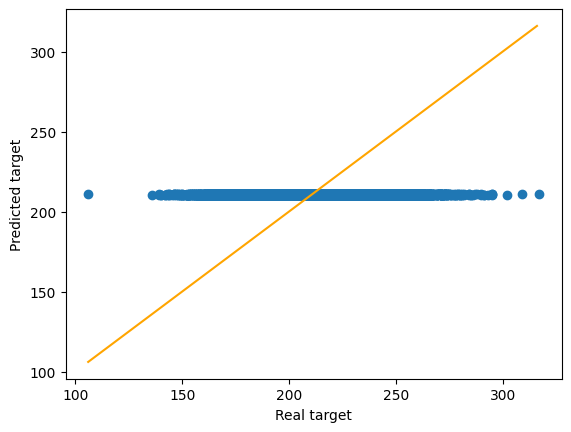

In [107]:
real_vs_pred(season_bl, X_train, y_train)

In [108]:
y_pred_baseline_2 = X_train['PTS_SEASON_BEFORE_AVG_TEAM_HOME'] + X_train['PTS_SEASON_BEFORE_AVG_TEAM_AWAY']

# Evaluate manually
mse = mean_squared_error(y_train, y_pred_baseline_2)
mae = mean_absolute_error(y_train, y_pred_baseline_2)
rmse = root_mean_squared_error(y_train, y_pred_baseline_2)
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

MSE: 351.55
RMSE: 18.75
MAE: 14.89


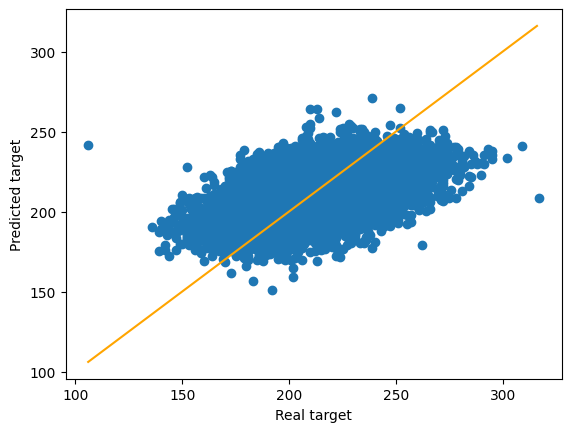

In [109]:
x_line = np.arange(y_train.min(), y_train.max())
plt.scatter(y_train, y_pred_baseline_2)
plt.plot(x_line, x_line, color='orange')
plt.xlabel('Real target')
plt.ylabel('Predicted target')
plt.show()

## Linear Regression

In [110]:
from sklearn.linear_model import LinearRegression

In [111]:
lr = LinearRegression()
cv_results = cross_validate(lr, X_train, y_train, cv=kf,
                            scoring=scoring, return_train_score=True)

lr.fit(X_train, y_train)
print_metrics(cv_results)

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/home/adrian_alvarez/Projects/NBA_over_under_predictor/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/adrian_alvarez/Projects/NBA_over_under_predictor/.venv/lib/python3.12/site-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/adrian_alvarez/Projects/NBA_over_under_predictor/.venv/lib/python3.12/site-packages/sklearn/linear_model/_base.py", line 601, in fit
    X, y = validate_data(
           ^^^^^^^^^^^^^^
  File "/home/adrian_alvarez/Projects/NBA_over_under_predictor/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py", line 2961, in validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/adrian_alvarez/Projects/NBA_over_under_predictor/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py", line 1370, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "/home/adrian_alvarez/Projects/NBA_over_under_predictor/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py", line 1107, in check_array
    _assert_all_finite(
  File "/home/adrian_alvarez/Projects/NBA_over_under_predictor/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py", line 120, in _assert_all_finite
    _assert_all_finite_element_wise(
  File "/home/adrian_alvarez/Projects/NBA_over_under_predictor/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py", line 169, in _assert_all_finite_element_wise
    raise ValueError(msg_err)
ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


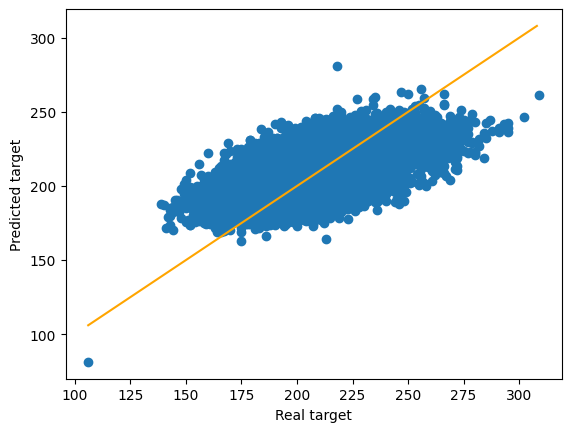

In [34]:
real_vs_pred(lr, X_train, y_train)

## Random Forest

In [112]:
from sklearn.ensemble import RandomForestRegressor

In [113]:
X_train.shape

(17611, 563)

In [114]:
rf = RandomForestRegressor(100, max_depth=5, max_features=0.6, n_jobs=-1, random_state=16)
cv_results = cross_validate(rf, X_train, y_train, cv=kf,
                            scoring=scoring, return_train_score=True, n_jobs=-1)

rf.fit(X_train, y_train)
print_metrics(cv_results)

Train MSE: 288.33017
Validation MSE: 305.57877

Train RMSE: 16.98022
Validation RMSE: 17.47947

Train MAE: 13.52359
Validation MAE: 13.89831



In [115]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_validate

# Example XGBoost regressor:
xgb_reg = XGBRegressor(
    max_depth=5,
    learning_rate=0.05,
    n_estimators=500,
    subsample=1.0,       # Equivalent to max_samples in GBRegressor
    colsample_bytree=0.8, # Equivalent to max_features in GBRegressor
    n_jobs=-1 
)

cv_results = cross_validate(
    xgb_reg, 
    X_train, y_train, 
    cv=kf, 
    scoring=scoring,      # Use your custom scoring or e.g. 'neg_mean_absolute_error'
    return_train_score=True,
    n_jobs=-1
)
# Train final model on full train set
xgb_reg.fit(X_train, y_train)

# Print metrics
print_metrics(cv_results)

Train MSE: 120.85865
Validation MSE: 302.80077

Train RMSE: 10.99333
Validation RMSE: 17.39994

Train MAE: 8.65397
Validation MAE: 13.81813



## Hyperparameter Tuning

In [119]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

### Randomized Search

### Grid Search

In [120]:
def print_rs_reg_scores(rs_model, best_idx):
    print(rs_model.best_params_)
    print()
    print('Train MAE:', rs_model.cv_results_['mean_train_MAE'][best_idx].round(5))
    print('Validation MAE:', rs_model.cv_results_['mean_test_MAE'][best_idx].round(5))
    # print()
    print('Train MSE:', rs_model.cv_results_['mean_train_MSE'][best_idx].round(5))
    print('Validation MSE:', rs_model.cv_results_['mean_test_MSE'][best_idx].round(5))
    # print('Train MedAE:', rs_model.cv_results_['mean_train_MedAE'][best_idx].round(1))
    # print('Validation MedAE:', rs_model.cv_results_['mean_test_MedAE'][best_idx].round(1))

In [121]:
import os
n_jobs = max(1, os.cpu_count() - 2)
print(f"Number of jobs: {n_jobs}")

Number of jobs: 10


In [124]:
X_train.shape


(17611, 563)

In [129]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Define the base model
xgb_reg = XGBRegressor(random_state=16, n_jobs=-1, tree_method="hist",
)

# Define hyperparameter grid
params = [{
    'n_estimators': [300, 400],  # Similar to GBRT
    'learning_rate': [0.02, 0.04, 0.03, 0.015],  # Fine-tuning LR
    'max_depth': [4, 5],  # Keeping it limited for efficiency
    'min_child_weight': [3, 4],  # Similar to min_samples_split in GBRT
    'subsample': [0.8, 0.5],  # Control for overfitting
    'colsample_bytree': [0.8, 1.0],  # Similar to max_features in GBRT
    'gamma': [0],  # Regularization parameter
}]
params = {
    "n_estimators": [200,600, 1000],
    "learning_rate": [0.03, 0.05,0.015],
    "max_depth": [3, 4, 5],
    "min_child_weight": [2, 5, 10],
    "subsample": [0.7, 0.85, 1.0],
    "colsample_bytree": [0.5, 0.7, 0.9],
    "gamma": [0,  1.0],
    "reg_lambda": [1, 3, 10],
    "reg_alpha": [0, 0.1, 0.5],
}
# GridSearchCV setup
xgb_gs = GridSearchCV(
    xgb_reg,
    param_grid=params,
    scoring=scoring,
    cv=kf,
    verbose=3,
    refit=lambda x: x["mean_test_MAE"].argmin(),  # Select best model based on MAE
    return_train_score=True,
    n_jobs=-1,

)

# Fit model
xgb_gs.fit(X_train, y_train)

Fitting 5 folds for each of 13122 candidates, totalling 65610 fits


[CV 3/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.03, max_depth=3, min_child_weight=2, n_estimators=200, reg_alpha=0, reg_lambda=1, subsample=0.7; MAE: (train=13.264, test=13.625) MSE: (train=278.352, test=290.702) RMSE: (train=16.684, test=17.050) total time=  18.6s
[CV 5/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.03, max_depth=3, min_child_weight=2, n_estimators=200, reg_alpha=0, reg_lambda=1, subsample=0.7; MAE: (train=13.231, test=13.825) MSE: (train=276.309, test=301.654) RMSE: (train=16.623, test=17.368) total time=  20.6s
[CV 1/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.03, max_depth=3, min_child_weight=2, n_estimators=200, reg_alpha=0, reg_lambda=1, subsample=0.7; MAE: (train=13.202, test=13.906) MSE: (train=275.163, test=308.767) RMSE: (train=16.588, test=17.572) total time=  22.8s
[CV 1/5] END colsample_bytree=0.5, gamma=0, learning_rate=0.03, max_depth=3, min_child_weight=2, n_estimators=200, reg_alpha=0, reg_lambda=1, subsample=1.0; MAE: (tra

KeyboardInterrupt: 

In [123]:
# Print metrics
xgb_gs.best_params_
print_rs_reg_scores(xgb_gs, xgb_gs.best_index_)

{'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.015, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 400, 'subsample': 0.5}

Train MAE: 11.90839
Validation MAE: 13.66327
Train MSE: 222.89821
Validation MSE: 296.04527


In [ ]:
{'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.015, 'max_depth': 4, 'min_child_weight': 4, 'n_estimators': 300, 'subsample': 0.5}

# Define the base model
xgb_reg = XGBRegressor(random_state=16, n_jobs=-1)

# Define hyperparameter grid
params = [{
    'n_estimators': [300,350],  # Similar to GBRT
    'learning_rate': [0.010, 0.012, 0.017, 0.015],  # Fine-tuning LR
    'max_depth': [5,4],  # Keeping it limited for efficiency
    'min_child_weight': [4,5],  # Similar to min_samples_split in GBRT
    'subsample': [0.5],  # Control for overfitting
    'colsample_bytree': [0.8],  # Similar to max_features in GBRT
    'gamma': [0],  # Regularization parameter
}]

# GridSearchCV setup
xgb_gs = GridSearchCV(
    xgb_reg,
    param_grid=params,
    scoring=scoring,
    cv=kf,
    verbose=3,
    refit=lambda x: x["mean_test_MAE"].argmin(),  # Select best model based on MAE
    return_train_score=True,
    n_jobs=n_jobs
)

# Fit model
xgb_gs.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 2/5] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=4, n_estimators=300, subsample=0.5; MAE: (train=12.247, test=13.465) MSE: (train=236.758, test=285.043) RMSE: (train=15.387, test=16.883) total time=  22.5s
[CV 1/5] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=4, n_estimators=300, subsample=0.5; MAE: (train=12.321, test=13.152) MSE: (train=238.679, test=275.752) RMSE: (train=15.449, test=16.606) total time=  23.2s
[CV 4/5] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=4, n_estimators=350, subsample=0.5; MAE: (train=12.174, test=13.203) MSE: (train=233.271, test=273.550) RMSE: (train=15.273, test=16.539) total time=  26.4s
[CV 5/5] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=4, n_estimators=300, subsample=0.5; MAE: (train=12.337, test=13.113) MSE: (train=239.261, t

GridSearchCV(cv=KFold(n_splits=5, random_state=16, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    inte...
                          'max_depth': [5, 4], 'min_child_weight': [4, 5],
                          'n_estimators': [300, 350], 'subsample': [0.5]}],
             refit=<function <lambda> at 0x7e5eda6ad580>,
             return_train_score=True,
             scoring={'MAE': make_scorer(mean_absolute_error, response_method='predict'),
                      'MSE': make_scorer(mean_squared_error, response_method='predict'),
                      'RMSE': make_scorer(root_mean_squared_error, response_method='predict')},
             verbose=3)

In [ ]:
# Print metrics
xgb_gs.best_params_
print_rs_reg_scores(xgb_gs, xgb_gs.best_index_)

{'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.012, 'max_depth': 4, 'min_child_weight': 4, 'n_estimators': 350, 'subsample': 0.5}

Train MAE: 12.5412
Validation MAE: 13.26569
Train MSE: 247.93007
Validation MSE: 278.07378


In [ ]:
import pickle

# Get the best model
best_model = xgb_gs.best_estimator_
#get_date
import datetime
now = datetime.datetime.now()
date_today = now.strftime("%Y-%m-%d")
name = f"best_xgboost{date_today}.pkl"
name_config = f"best_xgboost_config_{date_today}.pkl"
# Save the best model
with open(name, "wb") as f:
    pickle.dump(best_model, f)

# Save the best model configuration
with open(name_config, "wb") as f:
    pickle.dump(xgb_gs.best_params_, f)

print("Best model saved as", name)

Best model saved as best_xgboost2025-04-09.pkl


In [ ]:
#load model
with open(name, "rb") as f:
    best_model = pickle.load(f)

In [ ]:
feature_importances = best_model.feature_importances_
important_features = np.argsort(feature_importances)[::-1]  
feature_importances = pd.DataFrame({
    'Feature': X_train.columns[important_features],
    'Importance': feature_importances[important_features]
}).sort_values(by="Importance", ascending=False)
feature_importances

Feature  Importance
0                          TOTAL_PTS_SEASON_BEFORE_AVG    0.050066
1                                TOTAL_OVER_UNDER_LINE    0.047771
2    TOTAL_OVER_UNDER_LINE_SEASON_BEFORE_AVG_TEAM_HOME    0.044254
3             TOTAL_POINTS_SEASON_BEFORE_AVG_TEAM_AWAY    0.013697
4    TOTAL_OVER_UNDER_LINE_LAST_ALL_5_MATCHES_BEFOR...    0.009034
..                                                 ...         ...
346        TOP4_INJURED_PLAYER_TS_PCT_BEFORE_TEAM_HOME    0.000000
347    TOP5_INJURED_PLAYER_PACE_PER40_BEFORE_TEAM_AWAY    0.000000
348    TOP6_INJURED_PLAYER_PACE_PER40_BEFORE_TEAM_HOME    0.000000
349    TOP6_INJURED_PLAYER_DEF_RATING_BEFORE_TEAM_HOME    0.000000
350                                    IS_PLAYOFF_GAME    0.000000

[351 rows x 2 columns]

In [ ]:
only_important_features =  X_train.columns[important_features][:200]

In [ ]:
#repeat the analysis with only important features
xgb_reg_only_import = XGBRegressor(**best_model.get_params())

cv_results_important = cross_validate(
    xgb_reg_only_import, 
    X_train[only_important_features], y_train, 
    cv=kf, 
    scoring=scoring,      # Use your custom scoring or e.g. 'neg_mean_absolute_error'
    return_train_score=True,
    n_jobs=-1
)
# Train final model on full train set
xgb_reg_only_import.fit(X_train[only_important_features], y_train)

# Print metrics
print_metrics(cv_results_important)

Train MSE: 249.70255
Validation MSE: 277.28635

Train RMSE: 15.80192
Validation RMSE: 16.65089

Train MAE: 12.58724
Validation MAE: 13.24752



In [ ]:

{'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.012, 'max_depth': 4, 'min_child_weight': 4, 'n_estimators': 350, 'subsample': 0.5}
# Define the base model
xgb_reg = XGBRegressor(random_state=16, n_jobs=10)

# Define hyperparameter grid
params = [{
    'n_estimators': [350],  # Similar to GBRT
    'learning_rate': [0.011, 0.012,0.013, 0.014],  # Fine-tuning LR
    'max_depth': [3,4,5,6],  # Keeping it limited for efficiency
    'min_child_weight': [3,4,5],  # Similar to min_samples_split in GBRT
    'subsample': [0.6, 0.7, 0.5, 1, 0.8],  # Control for overfitting
    'colsample_bytree': [1,0.8],  # Similar to max_features in GBRT
    'gamma': [0],
    # 'reg_alpha': [0, 0.01, 0.1],
    # 'reg_lambda': [1, 1.5, 2],  # Regularization parameter
}]

# GridSearchCV setup
xgb_gs_import = GridSearchCV(
    xgb_reg,
    param_grid=params,
    scoring=scoring,
    cv=kf,
    verbose=3,
    refit=lambda x: x["mean_test_MAE"].argmin(), # Select best model based on MAE
    return_train_score=True,
    n_jobs= 10
)

# Fit model
xgb_gs_import.fit(X_train[only_important_features], y_train)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[CV 3/5] END colsample_bytree=1, gamma=0, learning_rate=0.011, max_depth=3, min_child_weight=3, n_estimators=350, subsample=0.6; MAE: (train=12.913, test=13.452) MSE: (train=263.526, test=286.542) RMSE: (train=16.233, test=16.928) total time=  13.5s
[CV 1/5] END colsample_bytree=1, gamma=0, learning_rate=0.011, max_depth=3, min_child_weight=3, n_estimators=350, subsample=0.7; MAE: (train=12.990, test=13.158) MSE: (train=266.168, test=275.524) RMSE: (train=16.315, test=16.599) total time=  16.3s
[CV 1/5] END colsample_bytree=1, gamma=0, learning_rate=0.011, max_depth=3, min_child_weight=3, n_estimators=350, subsample=0.6; MAE: (train=12.987, test=13.162) MSE: (train=266.031, test=275.490) RMSE: (train=16.310, test=16.598) total time=  17.0s
[CV 3/5] END colsample_bytree=1, gamma=0, learning_rate=0.011, max_depth=3, min_child_weight=3, n_estimators=350, subsample=0.7; MAE: (train=12.919, test=13.444) MSE: (train=263.649, test=286.315) RMSE: (train=16.237, test=16.921) total time=  18.4s


GridSearchCV(cv=KFold(n_splits=5, random_state=16, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    inte...
                          'min_child_weight': [3, 4, 5], 'n_estimators': [350],
                          'subsample': [0.6, 0.7, 0.5, 1, 0.8]}],
             refit=<function <lambda> at 0x7e5ecce08220>,
             return_train_score=True,
             scoring={'MAE': make_scorer(mean_absolute_error, response_method='predict'),
                      'MSE': make_scorer(mean_squared_error, response_method='predict'),
                      'RMSE': make_scorer(root_mean_squared_error, response_method='predict')},
             verbose=3)

In [ ]:
# Print metrics
xgb_gs_import.best_params_
print_rs_reg_scores(xgb_gs_import, xgb_gs_import.best_index_)

{'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.014, 'max_depth': 4, 'min_child_weight': 5, 'n_estimators': 350, 'subsample': 0.5}

Train MAE: 12.47023
Validation MAE: 13.24543
Train MSE: 245.07321
Validation MSE: 277.17739


In [104]:

{'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.014, 'max_depth': 4, 'min_child_weight': 5, 'n_estimators': 350, 'subsample': 0.5}

# Define the base model
xgb_reg = XGBRegressor(random_state=16, n_jobs=-1)

# Define hyperparameter grid
params = [{
    'n_estimators': [350],  # Similar to GBRT
    'learning_rate': [0.014, 0.015],  
    'max_depth': [4],  # Keeping it limited for efficiency
    'min_child_weight': [ 5,6],  # Similar to min_samples_split in GBRT
    'subsample': [0.5, 0.4],  # Control for overfitting
    'colsample_bytree': [1],  # Similar to max_features in GBRT
    'gamma': [0],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [1, 1.5, 2], 
    'colsample_bylevel': [0.7, 0.8,  1.0],
    'colsample_bynode': [0.8, 0.9, 1.0],# Regularization parameter
}]

# GridSearchCV setup
xgb_gs_import = GridSearchCV(
    xgb_reg,
    param_grid=params,
    scoring=scoring,
    cv=kf,
    verbose=3,
    refit=lambda x: x["mean_test_MAE"].argmin(), # Select best model based on MAE
    return_train_score=True,
    n_jobs=n_jobs
)

# Fit model
xgb_gs_import.fit(X_train[only_important_features], y_train)


Fitting 5 folds for each of 648 candidates, totalling 3240 fits


[CV 5/5] END colsample_bylevel=0.7, colsample_bynode=0.8, colsample_bytree=1, gamma=0, learning_rate=0.014, max_depth=4, min_child_weight=5, n_estimators=350, reg_alpha=0, reg_lambda=1, subsample=0.5; MAE: (train=12.558, test=13.099) MSE: (train=248.197, test=271.659) RMSE: (train=15.754, test=16.482) total time=  13.1s
[CV 3/5] END colsample_bylevel=0.7, colsample_bynode=0.8, colsample_bytree=1, gamma=0, learning_rate=0.014, max_depth=4, min_child_weight=5, n_estimators=350, reg_alpha=0, reg_lambda=1, subsample=0.5; MAE: (train=12.482, test=13.453) MSE: (train=245.376, test=286.822) RMSE: (train=15.664, test=16.936) total time=  14.9s
[CV 1/5] END colsample_bylevel=0.7, colsample_bynode=0.8, colsample_bytree=1, gamma=0, learning_rate=0.014, max_depth=4, min_child_weight=5, n_estimators=350, reg_alpha=0, reg_lambda=1, subsample=0.4; MAE: (train=12.553, test=13.150) MSE: (train=248.115, test=274.151) RMSE: (train=15.752, test=16.558) total time=  16.4s
[CV 3/5] END colsample_bylevel=0.7

GridSearchCV(cv=KFold(n_splits=5, random_state=16, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    inte...
                          'reg_alpha': [0, 0.01, 0.1],
                          'reg_lambda': [1, 1.5, 2], 'subsample': [0.5, 0.4]}],
             refit=<function <lambda> at 0x7e5ef35ea0c0>,
             return_train_score=True,
             scoring={'MAE': make_scorer(mean_absolute_error, response_method='predict'),
                      'MSE': make_scorer(mean_squared_error, response_method='predict'),
                      'RMSE': make_scorer(root_mean_squared_error, response_method='predict')},
             verbose=3)

In [105]:
xgb_gs_import.best_params_
print_rs_reg_scores(xgb_gs_import, xgb_gs_import.best_index_)

{'colsample_bylevel': 1.0, 'colsample_bynode': 0.8, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.015, 'max_depth': 4, 'min_child_weight': 6, 'n_estimators': 350, 'reg_alpha': 0.01, 'reg_lambda': 2, 'subsample': 0.4}

Train MAE: 12.45754
Validation MAE: 13.23756
Train MSE: 244.81766
Validation MSE: 276.9498


In [109]:
{'colsample_bylevel': 1.0, 'colsample_bynode': 0.8, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.015, 'max_depth': 4, 'min_child_weight': 6, 'n_estimators': 350, 'reg_alpha': 0.01, 'reg_lambda': 2, 'subsample': 0.4}

# Define the base model
xgb_reg = XGBRegressor(random_state=16, n_jobs=-1)

# Define hyperparameter grid
params = [{
    'n_estimators': [350, 400, 450, 1000],  # Similar to GBRT
    'learning_rate': [0.015],  
    'max_depth': [4,5],  # Keeping it limited for efficiency
    'min_child_weight': [ 6],  # Similar to min_samples_split in GBRT
    'subsample': [0.4],  # Control for overfitting
    'colsample_bytree': [1],  # Similar to max_features in GBRT
    'gamma': [0],
    'reg_alpha': [0.01],
    'reg_lambda': [2], 
    'colsample_bylevel': [1.0],
    'colsample_bynode': [0.8],# Regularization parameter
}]

# GridSearchCV setup
xgb_gs_import = GridSearchCV(
    xgb_reg,
    param_grid=params,
    scoring=scoring,
    cv=kf,
    verbose=3,
    refit=lambda x: x["mean_test_MAE"].argmin(), # Select best model based on MAE
    return_train_score=True,
    n_jobs=n_jobs
)

# Fit model
xgb_gs_import.fit(X_train[only_important_features], y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[CV 1/5] END colsample_bylevel=1.0, colsample_bynode=0.8, colsample_bytree=1, gamma=0, learning_rate=0.015, max_depth=4, min_child_weight=6, n_estimators=350, reg_alpha=0.01, reg_lambda=2, subsample=0.4; MAE: (train=12.480, test=13.120) MSE: (train=245.390, test=273.383) RMSE: (train=15.665, test=16.534) total time=   8.6s
[CV 4/5] END colsample_bylevel=1.0, colsample_bynode=0.8, colsample_bytree=1, gamma=0, learning_rate=0.015, max_depth=4, min_child_weight=6, n_estimators=350, reg_alpha=0.01, reg_lambda=2, subsample=0.4; MAE: (train=12.484, test=13.154) MSE: (train=246.051, test=271.832) RMSE: (train=15.686, test=16.487) total time=   8.5s
[CV 2/5] END colsample_bylevel=1.0, colsample_bynode=0.8, colsample_bytree=1, gamma=0, learning_rate=0.015, max_depth=4, min_child_weight=6, n_estimators=400, reg_alpha=0.01, reg_lambda=2, subsample=0.4; MAE: (train=12.319, test=13.421) MSE: (train=239.570, test=282.817) RMSE: (train=15.478, test=16.817) total time=   8.4s
[CV 2/5] END colsample_by

GridSearchCV(cv=KFold(n_splits=5, random_state=16, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    inte...
                          'n_estimators': [350, 400, 450, 1000],
                          'reg_alpha': [0.01], 'reg_lambda': [2],
                          'subsample': [0.4]}],
             refit=<function <lambda> at 0x7e5ef340e480>,
             return_train_score=True,
             scoring={'MAE': make_scorer(mean_absolute_error, response_method='predict'),
                      'MSE': make_scorer(mean_squared_error, response_method='predict'),
                      'RMSE': make_scorer(root_mean_squared_error, response_method='predict')},
             verbose=3)

In [110]:
xgb_gs_import.best_params_
print_rs_reg_scores(xgb_gs_import, xgb_gs_import.best_index_)

{'colsample_bylevel': 1.0, 'colsample_bynode': 0.8, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.015, 'max_depth': 4, 'min_child_weight': 6, 'n_estimators': 350, 'reg_alpha': 0.01, 'reg_lambda': 2, 'subsample': 0.4}

Train MAE: 12.45754
Validation MAE: 13.23756
Train MSE: 244.81766
Validation MSE: 276.9498


In [111]:
import pickle

# Get the best model
best_model = xgb_gs_import.best_estimator_
#get_date
import datetime
now = datetime.datetime.now()
date_today = now.strftime("%Y-%m-%d")
name = f"best_xgboost_important{date_today}.pkl"
name_config = f"best_xgboost_important_config_{date_today}.pkl"
# Save the best model
with open(name, "wb") as f:
    pickle.dump(best_model, f)

# Save the best model configuration
with open(name_config, "wb") as f:
    pickle.dump(xgb_gs_import.best_params_, f)

print("Best model saved as", name)

Best model saved as best_xgboost_important2025-04-09.pkl


# Train whole data

In [ ]:
# name = "/home/adrian_alvarez/Projects/NBA-predictor/lab/integrate_all_bets/best_xgboost_important2025-04-06.pkl"

In [112]:
import pickle

with open(name, "rb") as f:
    best_model = pickle.load(f)

best_params = best_model.get_params()

In [113]:
from xgboost import XGBRegressor

production_model = XGBRegressor(**best_params)
production_model.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=1.0, colsample_bynode=0.8, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.015, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=6, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=350,
             n_jobs=-1, num_parallel_tree=None, random_state=16, ...)

In [114]:
import datetime

date_today = datetime.datetime.now().strftime("%Y-%m-%d")
production_model_filename = f"production_regressor_xgb_{date_today}.pkl"

with open(production_model_filename, "wb") as f:
    pickle.dump(production_model, f)

print("Production-ready model saved as", production_model_filename)


Production-ready model saved as production_regressor_xgb_2025-04-09.pkl
